In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def Load_Data(name):
    df_f = pd.read_csv(name+".csv")
    df_f=df_f.dropna(axis=0)
    df_f = df_f[(df_f['TIME']<=300.00) & (df_f['TIME']>=-300.00)]
    return df_f

In [3]:
df_s=Load_Data("E9HT09_20mS")
df_s1=Load_Data("E9HT04_20mS-1")

In [4]:
df_s2=Load_Data("E9HT10_20mS")
df_s2

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,MTI6732,MVC521,MVC703,RPI776,RPI766,RPI796,RPI771A,RVC777,MVC530C,RVC777C
40000,-300.00,0.095,0.102,0.110,3.403,4.927,0.100,0.095,0.098,0.063,...,100,0.711,0.329,40.716,7.839,175.914,40.544,-0.410,-0.016,-0.204
40001,-299.98,0.095,0.102,0.110,3.403,4.948,0.100,0.095,0.098,0.062,...,100,0.711,0.329,40.716,7.839,175.914,40.544,-0.410,-0.016,-0.204
40002,-299.96,0.095,0.102,0.109,3.403,4.948,0.100,0.095,0.098,0.062,...,100,0.711,0.329,40.716,7.839,175.914,40.544,-0.410,-0.016,-0.204
40003,-299.94,0.095,0.102,0.110,3.403,4.933,0.100,0.095,0.098,0.062,...,100,0.711,0.329,40.716,7.839,175.914,40.544,-0.410,-0.016,-0.204
40004,-299.92,0.095,0.102,0.110,3.403,4.922,0.100,0.095,0.098,0.062,...,100,0.711,0.329,40.716,7.839,175.914,40.544,-0.410,-0.016,-0.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,299.92,5.566,2.983,7.817,3.465,4.930,0.217,0.353,3.741,7.619,...,100,-0.082,0.279,40.670,7.838,176.369,40.453,-0.426,0.003,-0.197
69997,299.94,5.561,2.978,7.822,3.475,4.931,0.217,0.352,3.735,7.623,...,100,-0.082,0.279,40.670,7.838,176.369,40.453,-0.426,0.003,-0.197
69998,299.96,5.562,2.985,7.808,3.482,4.947,0.216,0.353,3.739,7.609,...,100,-0.082,0.279,40.670,7.838,176.369,40.453,-0.426,0.003,-0.197
69999,299.98,5.562,2.979,7.808,3.483,4.962,0.216,0.353,3.736,7.587,...,100,-0.082,0.279,40.670,7.838,176.369,40.453,-0.426,0.003,-0.197


In [5]:
df_s3=Load_Data("E9HT12_20mS")
df_s3

,TIME,PC1,PGDI1,PHCHI,PECBI,POTE1,PHBSO2,PHGI,PHVI1,PHBSO1,...,MTI6732,MVC521,MVC703,RPI776,RPI766,RPI796,RPI771A,RVC777,MVC530C,RVC777C
40000,-300.00,0.084,0.100,0.110,4.946,0.100,0.095,0.098,0.072,0.091,...,99.997,0.344,0.452,1.968,1.007,47.545,1.802,-0.410,-0.009,-0.174
40001,-299.98,0.084,0.101,0.110,4.969,0.100,0.095,0.098,0.071,0.091,...,99.997,0.344,0.452,1.968,1.007,47.545,1.802,-0.410,-0.009,-0.174
40002,-299.96,0.084,0.101,0.110,4.970,0.100,0.095,0.098,0.070,0.091,...,99.997,0.344,0.452,1.968,1.007,47.545,1.802,-0.410,-0.009,-0.174
40003,-299.94,0.084,0.100,0.110,4.955,0.100,0.095,0.098,0.070,0.091,...,99.997,0.344,0.452,1.968,1.007,47.545,1.802,-0.410,-0.009,-0.174
40004,-299.92,0.084,0.101,0.111,4.943,0.100,0.095,0.098,0.070,0.091,...,99.997,0.344,0.452,1.968,1.007,47.545,1.802,-0.410,-0.009,-0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,299.92,6.649,4.144,9.349,4.958,0.279,0.597,5.314,8.490,0.586,...,99.997,-0.346,0.263,1.996,1.008,47.495,1.945,-0.414,-0.024,-0.189
69997,299.94,6.648,4.154,9.339,4.951,0.277,0.596,5.316,8.480,0.585,...,99.997,-0.346,0.263,1.996,1.008,47.495,1.945,-0.414,-0.024,-0.189
69998,299.96,6.658,4.151,9.357,4.943,0.279,0.598,5.321,8.494,0.588,...,99.997,-0.346,0.263,1.996,1.008,47.495,1.945,-0.414,-0.024,-0.189
69999,299.98,6.646,4.154,9.360,4.944,0.279,0.598,5.312,8.463,0.587,...,99.997,-0.346,0.263,1.996,1.008,47.495,1.945,-0.414,-0.024,-0.189


In [6]:
TS = pd.concat([df_s,df_s1,df_s2,df_s3])
TS

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVO2,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513
40000,-300.00,0.095,0.100,0.115,3.409,4.832,0.100,0.095,0.097,0.073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40001,-299.98,0.095,0.100,0.115,3.409,4.856,0.100,0.095,0.097,0.074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40002,-299.96,0.095,0.100,0.115,3.409,4.866,0.100,0.095,0.097,0.074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40003,-299.94,0.095,0.100,0.115,3.409,4.850,0.100,0.095,0.097,0.074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40004,-299.92,0.095,0.100,0.116,3.409,4.837,0.100,0.095,0.097,0.073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,299.92,6.649,4.144,9.349,NaN,4.958,0.279,0.597,5.314,8.490,...,5.863,10.088,86.296,86.577,87.762,303.423,303.441,2.598,28.329,999.142
69997,299.94,6.648,4.154,9.339,NaN,4.951,0.277,0.596,5.316,8.480,...,5.865,10.046,86.296,86.577,87.762,303.423,303.441,2.598,28.329,999.142
69998,299.96,6.658,4.151,9.357,NaN,4.943,0.279,0.598,5.321,8.494,...,5.870,10.106,86.296,86.577,87.762,303.423,303.441,2.598,28.329,999.142
69999,299.98,6.646,4.154,9.360,NaN,4.944,0.279,0.598,5.312,8.463,...,5.870,10.048,86.296,86.577,87.762,303.423,303.441,2.598,28.329,999.142


In [7]:
TS = TS[(TS['TIME']<=100.00) & (TS['TIME']>=-100.00)]
TS = TS.fillna(TS.mean())

In [8]:
TS

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVO2,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513
50000,-100.00,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50001,-99.98,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50002,-99.96,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50003,-99.94,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50004,-99.92,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.387,3.712,8.779,3.257357,4.974,0.252,0.532,4.800,7.888,...,4.981000,9.668000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000
59997,99.94,6.397,3.716,8.782,3.257357,4.984,0.252,0.531,4.795,7.874,...,4.964000,9.653000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000
59998,99.96,6.385,3.710,8.773,3.257357,4.977,0.252,0.530,4.804,7.881,...,4.978000,9.660000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000
59999,99.98,6.395,3.716,8.773,3.257357,4.970,0.252,0.530,4.796,7.876,...,4.964000,9.670000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000


In [9]:
success = [1]*40004
TS['SUCCESS']=success


C:\Users\DELL\AppData\Local\Temp\ipykernel_3276\3349896455.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TS['SUCCESS']=success


In [10]:
TS

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513,SUCCESS
50000,-100.00,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50001,-99.98,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50002,-99.96,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50003,-99.94,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50004,-99.92,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.387,3.712,8.779,3.257357,4.974,0.252,0.532,4.800,7.888,...,9.668000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000,1
59997,99.94,6.397,3.716,8.782,3.257357,4.984,0.252,0.531,4.795,7.874,...,9.653000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000,1
59998,99.96,6.385,3.710,8.773,3.257357,4.977,0.252,0.530,4.804,7.881,...,9.660000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000,1
59999,99.98,6.395,3.716,8.773,3.257357,4.970,0.252,0.530,4.796,7.876,...,9.670000,85.555000,85.593000,87.005000,303.178000,302.547000,2.791000,28.663000,999.294000,1


In [11]:
df_f = Load_Data("E9HT13_20mS")

In [12]:
df_f = df_f[(df_f['TIME']<=100.00) & (df_f['TIME']>=-100.00)]

In [13]:
df_f.fillna(df_f.mean())

,TIME,PC1,PGDI1,PHCHI,PECBI,POTE1,PHBSO2,PHGI,PHVI1,PHBSO1,...,MTI6732,MVC521,MVC703,RPI776,RPI766,RPI796,RPI771A,RVC777,MVC530C,RVC777C
50000,-100.00,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.305,0.092,...,99.997,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208
50001,-99.98,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.305,0.092,...,99.997,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208
50002,-99.96,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,99.997,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208
50003,-99.94,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,99.997,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208
50004,-99.92,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,99.997,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,4.813,0.286,0.606,5.496,8.743,0.595,...,99.997,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201
59997,99.94,6.915,4.298,9.623,4.821,0.287,0.604,5.495,8.753,0.593,...,99.997,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201
59998,99.96,6.918,4.290,9.642,4.828,0.287,0.604,5.490,8.747,0.593,...,99.997,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201
59999,99.98,6.919,4.297,9.632,4.820,0.286,0.604,5.498,8.787,0.592,...,99.997,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201


In [14]:
success = [0]*10001
df_f['SUCCESS']=success
df_f

,TIME,PC1,PGDI1,PHCHI,PECBI,POTE1,PHBSO2,PHGI,PHVI1,PHBSO1,...,MVC521,MVC703,RPI776,RPI766,RPI796,RPI771A,RVC777,MVC530C,RVC777C,SUCCESS
50000,-100.00,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.305,0.092,...,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208,0
50001,-99.98,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.305,0.092,...,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208,0
50002,-99.96,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208,0
50003,-99.94,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208,0
50004,-99.92,0.084,0.101,0.112,4.765,0.100,0.096,0.098,0.304,0.092,...,0.213,0.052,18.944,1.008,48.488,18.588,-0.357,-0.024,-0.208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,4.813,0.286,0.606,5.496,8.743,0.595,...,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201,0
59997,99.94,6.915,4.298,9.623,4.821,0.287,0.604,5.495,8.753,0.593,...,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201,0
59998,99.96,6.918,4.290,9.642,4.828,0.287,0.604,5.490,8.747,0.593,...,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201,0
59999,99.98,6.919,4.297,9.632,4.820,0.286,0.604,5.498,8.787,0.592,...,-0.369,0.083,19.225,1.010,48.504,18.898,-0.342,0.003,-0.201,0


In [15]:
TOT = pd.concat([TS,df_f])
TOT

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513,SUCCESS
50000,-100.00,0.094,0.100,0.114,3.37,4.835,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50001,-99.98,0.094,0.100,0.115,3.37,4.860,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50002,-99.96,0.094,0.100,0.115,3.37,4.855,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50003,-99.94,0.094,0.100,0.115,3.37,4.841,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50004,-99.92,0.094,0.100,0.115,3.37,4.830,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,NaN,4.813,0.286,0.606,5.496,8.743,...,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59997,99.94,6.915,4.298,9.623,NaN,4.821,0.287,0.604,5.495,8.753,...,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59998,99.96,6.918,4.290,9.642,NaN,4.828,0.287,0.604,5.490,8.747,...,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59999,99.98,6.919,4.297,9.632,NaN,4.820,0.286,0.604,5.498,8.787,...,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0


In [16]:
TOT = TOT.fillna(TOT.mean())
TOT

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513,SUCCESS
50000,-100.00,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50001,-99.98,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50002,-99.96,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50003,-99.94,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50004,-99.92,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,3.257357,4.813,0.286,0.606,5.496,8.743,...,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59997,99.94,6.915,4.298,9.623,3.257357,4.821,0.287,0.604,5.495,8.753,...,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59998,99.96,6.918,4.290,9.642,3.257357,4.828,0.287,0.604,5.490,8.747,...,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59999,99.98,6.919,4.297,9.632,3.257357,4.820,0.286,0.604,5.498,8.787,...,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0


In [17]:
Components = TOT.iloc[:,1:862]
Result=TOT.iloc[:,862]
Time = TOT.iloc[:,0]
Components

,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,PEPR2,...,POTCVO2,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513
50000,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50001,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50002,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50003,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50004,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,6.925,4.293,9.634,3.257357,4.813,0.286,0.606,5.496,8.743,3.26469,...,6.085000,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59997,6.915,4.298,9.623,3.257357,4.821,0.287,0.604,5.495,8.753,3.26469,...,6.088000,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59998,6.918,4.290,9.642,3.257357,4.828,0.287,0.604,5.490,8.747,3.26469,...,6.089000,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59999,6.919,4.297,9.632,3.257357,4.820,0.286,0.604,5.498,8.787,3.26469,...,6.089000,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000


In [21]:
# getOptimalNvalue(Components,861)-->23

In [22]:
def Pca(df,n):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled)
    pca = PCA(n_components = n)
    df_pca = pca.fit_transform(df_scaled)
    df_pca = pd.DataFrame(df_pca)
    col = []
    for i in range(1,n+1):
        col.append("PC"+str(i))
    df_pca.columns = col
    return df_pca

In [23]:
Reduced=Pca(Components,23)
Reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-15.398286,-7.611882,15.014115,-9.184970,2.065909,6.996493,6.155007,-4.469461,4.453583,2.437985,...,1.317980,0.921141,0.586867,0.190562,-0.252192,0.950194,-0.689860,-0.928316,1.125496,-0.214428
1,-15.463109,-7.453964,15.049177,-9.489996,2.168923,6.928859,6.187389,-4.453201,4.455902,2.436948,...,1.201525,0.885601,0.538087,0.131301,-0.366623,0.919499,-0.739926,-0.982812,1.093602,-0.224889
2,-15.432914,-7.507198,15.030345,-9.367399,2.232517,6.904191,6.173640,-4.502535,4.449041,2.436262,...,1.174101,0.893264,0.602479,0.138248,-0.343490,0.929757,-0.769841,-0.973216,1.097644,-0.250937
3,-15.453588,-7.391735,15.123199,-9.608739,2.299183,6.879610,6.194124,-4.408185,4.454156,2.432015,...,1.150880,0.874995,0.620710,0.093567,-0.250484,0.952015,-0.860964,-0.901693,1.173767,-0.274941
4,-15.463692,-7.484221,15.065014,-9.525434,2.263609,6.887111,6.204349,-4.403018,4.436732,2.427618,...,1.143156,0.868122,0.598614,0.053091,-0.283964,0.926425,-0.924655,-0.902260,1.181379,-0.278253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,21.781995,20.877041,7.605694,3.857348,-8.109497,9.540183,-0.897130,3.849451,-0.402910,3.435247,...,-5.078532,-2.160004,1.075817,1.001902,-3.087565,-0.678333,0.033421,0.035981,-1.219733,1.623473
50001,21.747377,20.931847,7.714312,3.869596,-8.059362,9.545801,-0.884503,3.846113,-0.390111,3.440364,...,-5.133981,-2.182065,0.991240,1.003001,-3.177721,-0.695651,0.076904,-0.003003,-1.249120,1.659058
50002,21.755059,20.947177,7.597585,3.787477,-8.094539,9.549718,-0.859547,3.900360,-0.405605,3.435795,...,-5.109808,-2.176015,1.033342,0.956742,-3.080017,-0.692072,-0.023611,0.074996,-1.172519,1.638873
50003,21.710830,20.912024,7.717253,3.845136,-7.975303,9.552402,-0.879176,3.889858,-0.426906,3.433677,...,-5.130621,-2.189164,1.022898,0.983112,-3.119228,-0.675963,-0.036830,0.058720,-1.183889,1.611971


In [24]:
Time.reset_index(drop=True,inplace=True)

In [25]:
Result.reset_index(drop=True,inplace=True)

In [26]:
Final = pd.concat([Time,Reduced,Result],axis=1)

In [27]:
Final

,TIME,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,SUCCESS
0,-100.00,-15.398286,-7.611882,15.014115,-9.184970,2.065909,6.996493,6.155007,-4.469461,4.453583,...,0.921141,0.586867,0.190562,-0.252192,0.950194,-0.689860,-0.928316,1.125496,-0.214428,1
1,-99.98,-15.463109,-7.453964,15.049177,-9.489996,2.168923,6.928859,6.187389,-4.453201,4.455902,...,0.885601,0.538087,0.131301,-0.366623,0.919499,-0.739926,-0.982812,1.093602,-0.224889,1
2,-99.96,-15.432914,-7.507198,15.030345,-9.367399,2.232517,6.904191,6.173640,-4.502535,4.449041,...,0.893264,0.602479,0.138248,-0.343490,0.929757,-0.769841,-0.973216,1.097644,-0.250937,1
3,-99.94,-15.453588,-7.391735,15.123199,-9.608739,2.299183,6.879610,6.194124,-4.408185,4.454156,...,0.874995,0.620710,0.093567,-0.250484,0.952015,-0.860964,-0.901693,1.173767,-0.274941,1
4,-99.92,-15.463692,-7.484221,15.065014,-9.525434,2.263609,6.887111,6.204349,-4.403018,4.436732,...,0.868122,0.598614,0.053091,-0.283964,0.926425,-0.924655,-0.902260,1.181379,-0.278253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,99.92,21.781995,20.877041,7.605694,3.857348,-8.109497,9.540183,-0.897130,3.849451,-0.402910,...,-2.160004,1.075817,1.001902,-3.087565,-0.678333,0.033421,0.035981,-1.219733,1.623473,0
50001,99.94,21.747377,20.931847,7.714312,3.869596,-8.059362,9.545801,-0.884503,3.846113,-0.390111,...,-2.182065,0.991240,1.003001,-3.177721,-0.695651,0.076904,-0.003003,-1.249120,1.659058,0
50002,99.96,21.755059,20.947177,7.597585,3.787477,-8.094539,9.549718,-0.859547,3.900360,-0.405605,...,-2.176015,1.033342,0.956742,-3.080017,-0.692072,-0.023611,0.074996,-1.172519,1.638873,0
50003,99.98,21.710830,20.912024,7.717253,3.845136,-7.975303,9.552402,-0.879176,3.889858,-0.426906,...,-2.189164,1.022898,0.983112,-3.119228,-0.675963,-0.036830,0.058720,-1.183889,1.611971,0


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(Final.iloc[:,:24],Final.iloc[:,24],test_size = 0.3)

In [29]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [30]:
x=lda.fit_transform(X_train,Y_train)

In [31]:
print(accuracy_score(lda.predict(X_test),Y_test))

1.0


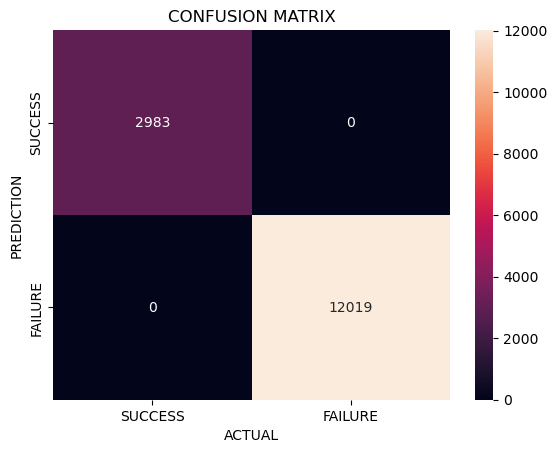

In [53]:
cm=confusion_matrix(lda.predict(X_test),Y_test)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['SUCCESS','FAILURE'],yticklabels=['SUCCESS','FAILURE'])
plt.ylabel("PREDICTION")
plt.xlabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()

In [32]:
x

array([[-26.06484429],
       [-25.99778999],
       [104.22602408],
       ...,
       [-26.13213384],
       [-26.61541356],
       [-27.21962262]])

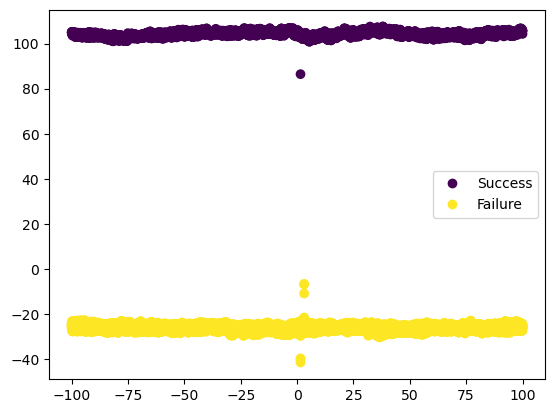

In [33]:
scatter1=plt.scatter(X_train['TIME'],x,c=lda.predict(X_train))
plt.legend(handles=scatter1.legend_elements()[0],labels=['Success','Failure'])

In [34]:
TOTF = pd.concat([TOT,df_f,df_f,df_f])
TOTF


,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513,SUCCESS
50000,-100.00,0.094,0.100,0.114,3.37,4.835,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50001,-99.98,0.094,0.100,0.115,3.37,4.860,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50002,-99.96,0.094,0.100,0.115,3.37,4.855,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50003,-99.94,0.094,0.100,0.115,3.37,4.841,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50004,-99.92,0.094,0.100,0.115,3.37,4.830,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,NaN,4.813,0.286,0.606,5.496,8.743,...,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59997,99.94,6.915,4.298,9.623,NaN,4.821,0.287,0.604,5.495,8.753,...,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59998,99.96,6.918,4.290,9.642,NaN,4.828,0.287,0.604,5.490,8.747,...,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59999,99.98,6.919,4.297,9.632,NaN,4.820,0.286,0.604,5.498,8.787,...,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0


In [35]:
TOTF = TOTF.fillna(TOT.mean())
TOTF

,TIME,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,...,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513,SUCCESS
50000,-100.00,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50001,-99.98,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50002,-99.96,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50003,-99.94,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
50004,-99.92,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,...,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,99.92,6.925,4.293,9.634,3.257357,4.813,0.286,0.606,5.496,8.743,...,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59997,99.94,6.915,4.298,9.623,3.257357,4.821,0.287,0.604,5.495,8.753,...,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59998,99.96,6.918,4.290,9.642,3.257357,4.828,0.287,0.604,5.490,8.747,...,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0
59999,99.98,6.919,4.297,9.632,3.257357,4.820,0.286,0.604,5.498,8.787,...,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000,0


In [36]:
Componentsf = TOTF.iloc[:,1:862]
Resultf=TOTF.iloc[:,862]
Timef = TOTF.iloc[:,0]
Componentsf

,PC1,PGDI1,PHCHI,PEPR1,PECBI,POTE1,PHBSO2,PHGI,PHVI1,PEPR2,...,POTCVO2,POTCVI,TOCVE,TSOCVI,TSOCVE,TTCVA,TTCVIS,MFQ5580,MPI709A,MPV7513
50000,0.094,0.100,0.114,3.370000,4.835,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50001,0.094,0.100,0.115,3.370000,4.860,0.100,0.096,0.097,0.309,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50002,0.094,0.100,0.115,3.370000,4.855,0.100,0.096,0.097,0.309,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50003,0.094,0.100,0.115,3.370000,4.841,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
50004,0.094,0.100,0.115,3.370000,4.830,0.100,0.096,0.097,0.310,3.38000,...,2.484048,4.667024,83.753419,83.603463,85.139111,303.215191,302.353724,1.458004,28.622357,999.077924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,6.925,4.293,9.634,3.257357,4.813,0.286,0.606,5.496,8.743,3.26469,...,6.085000,10.701000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59997,6.915,4.298,9.623,3.257357,4.821,0.287,0.604,5.495,8.753,3.26469,...,6.088000,10.679000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59998,6.918,4.290,9.642,3.257357,4.828,0.287,0.604,5.490,8.747,3.26469,...,6.089000,10.709000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000
59999,6.919,4.297,9.632,3.257357,4.820,0.286,0.604,5.498,8.787,3.26469,...,6.089000,10.681000,86.458000,86.492000,87.875000,301.659000,302.186000,2.423000,28.510000,983.012000


In [39]:
Reducedf=Pca(Componentsf,23)
Reducedf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-16.438096,12.256311,18.499480,-10.187305,2.035071,8.382788,5.002961,5.153724,1.064253,4.579929,...,0.496515,1.016073,-1.061952,-0.837372,0.980992,0.275884,-0.268511,-0.372443,-1.292170,0.241716
1,-16.500103,12.120532,18.511226,-10.514547,2.153856,8.342401,5.038896,5.148250,1.065507,4.591012,...,0.514814,0.837906,-1.017893,-0.804237,1.025116,0.098718,-0.339429,-0.445511,-1.306258,0.256834
2,-16.477867,12.193483,18.505663,-10.368228,2.210825,8.326646,5.028282,5.207009,1.069992,4.573425,...,0.513041,0.866195,-0.952107,-0.801295,1.028009,0.123347,-0.339016,-0.458852,-1.304065,0.255387
3,-16.494356,12.080427,18.585119,-10.615932,2.288577,8.299346,5.030750,5.143975,1.063227,4.608916,...,0.490392,0.849395,-0.865689,-0.869433,1.022975,0.171013,-0.329735,-0.528548,-1.294476,0.351530
4,-16.514518,12.174514,18.537448,-10.539773,2.232920,8.300830,5.034766,5.126210,1.063796,4.591267,...,0.490309,0.818358,-0.865557,-0.901630,1.022933,0.115426,-0.356319,-0.592162,-1.298329,0.378616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80003,22.417723,-11.179195,2.293853,0.908205,-3.036445,7.670527,-0.725471,-3.743856,2.598165,2.049266,...,-1.490299,-1.553911,1.990703,0.453642,-0.109629,-1.481316,1.111174,-1.013970,0.401619,-0.903714
80004,22.390867,-11.243361,2.401015,0.956485,-2.966586,7.696565,-0.705447,-3.734640,2.597062,2.062158,...,-1.467253,-1.672300,1.955497,0.496351,-0.085293,-1.567778,1.090872,-0.997513,0.395721,-0.941431
80005,22.403052,-11.241157,2.271517,0.841624,-2.999048,7.680641,-0.692354,-3.778544,2.589041,2.072127,...,-1.495567,-1.601618,2.035924,0.404147,-0.114309,-1.486092,1.102137,-1.063336,0.408405,-0.810939
80006,22.344167,-11.202801,2.412806,0.940768,-2.884255,7.716186,-0.706276,-3.769007,2.604339,2.035075,...,-1.492558,-1.648041,2.010735,0.458910,-0.074303,-1.532192,1.076721,-1.078721,0.404164,-0.822748


In [40]:
Timef.reset_index(drop=True,inplace=True)

In [41]:
Resultf.reset_index(drop=True,inplace=True)
Finalf = pd.concat([Time,Reduced,Result],axis=1)
Finalf

,TIME,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,SUCCESS
0,-100.00,-15.398286,-7.611882,15.014115,-9.184970,2.065909,6.996493,6.155007,-4.469461,4.453583,...,0.921141,0.586867,0.190562,-0.252192,0.950194,-0.689860,-0.928316,1.125496,-0.214428,1
1,-99.98,-15.463109,-7.453964,15.049177,-9.489996,2.168923,6.928859,6.187389,-4.453201,4.455902,...,0.885601,0.538087,0.131301,-0.366623,0.919499,-0.739926,-0.982812,1.093602,-0.224889,1
2,-99.96,-15.432914,-7.507198,15.030345,-9.367399,2.232517,6.904191,6.173640,-4.502535,4.449041,...,0.893264,0.602479,0.138248,-0.343490,0.929757,-0.769841,-0.973216,1.097644,-0.250937,1
3,-99.94,-15.453588,-7.391735,15.123199,-9.608739,2.299183,6.879610,6.194124,-4.408185,4.454156,...,0.874995,0.620710,0.093567,-0.250484,0.952015,-0.860964,-0.901693,1.173767,-0.274941,1
4,-99.92,-15.463692,-7.484221,15.065014,-9.525434,2.263609,6.887111,6.204349,-4.403018,4.436732,...,0.868122,0.598614,0.053091,-0.283964,0.926425,-0.924655,-0.902260,1.181379,-0.278253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,99.92,21.781995,20.877041,7.605694,3.857348,-8.109497,9.540183,-0.897130,3.849451,-0.402910,...,-2.160004,1.075817,1.001902,-3.087565,-0.678333,0.033421,0.035981,-1.219733,1.623473,0
50001,99.94,21.747377,20.931847,7.714312,3.869596,-8.059362,9.545801,-0.884503,3.846113,-0.390111,...,-2.182065,0.991240,1.003001,-3.177721,-0.695651,0.076904,-0.003003,-1.249120,1.659058,0
50002,99.96,21.755059,20.947177,7.597585,3.787477,-8.094539,9.549718,-0.859547,3.900360,-0.405605,...,-2.176015,1.033342,0.956742,-3.080017,-0.692072,-0.023611,0.074996,-1.172519,1.638873,0
50003,99.98,21.710830,20.912024,7.717253,3.845136,-7.975303,9.552402,-0.879176,3.889858,-0.426906,...,-2.189164,1.022898,0.983112,-3.119228,-0.675963,-0.036830,0.058720,-1.183889,1.611971,0


In [42]:
X_trainf,X_testf,Y_trainf,Y_testf=train_test_split(Finalf.iloc[:,:24],Finalf.iloc[:,24],test_size = 0.3)
ldaf = LinearDiscriminantAnalysis(n_components=1)
xf=ldaf.fit_transform(X_trainf,Y_trainf)
print(accuracy_score(lda.predict(X_testf),Y_testf))
xf

1.0


array([[104.90276221],
       [-25.43347786],
       [-25.09210161],
       ...,
       [-26.93108082],
       [-25.71692505],
       [-25.50665238]])

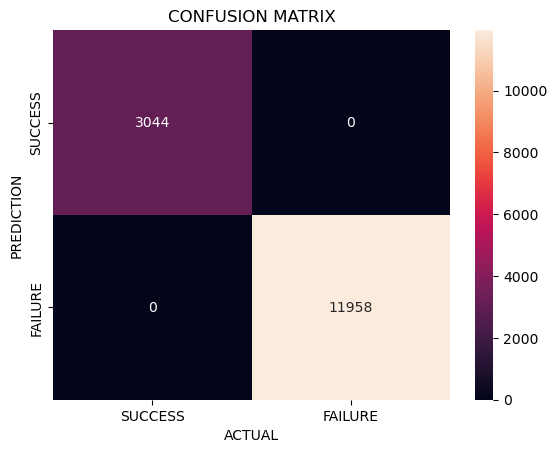

In [55]:
con_mat=confusion_matrix(lda.predict(X_testf),Y_testf)
sns.heatmap(con_mat,annot=True,fmt='g',xticklabels=['SUCCESS','FAILURE'],yticklabels=['SUCCESS','FAILURE'])
plt.ylabel("PREDICTION")
plt.xlabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()

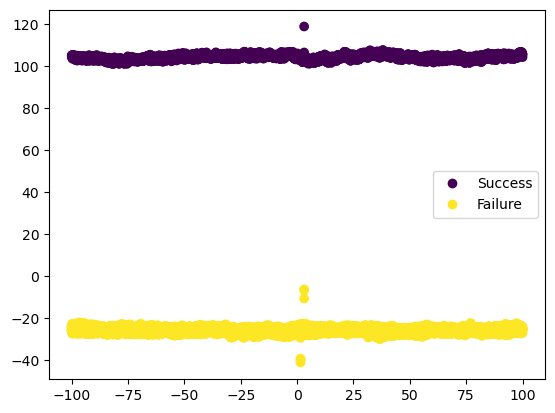

In [43]:
scatter=plt.scatter(X_trainf['TIME'],xf,c=lda.predict(X_trainf))
plt.legend(handles=scatter.legend_elements()[0],labels=['Success','Failure'])
plt.show()

In [64]:
# WITHOUT DOING PCA
X_trainff,X_testff,Y_trainff,Y_testff=train_test_split(TOTF.iloc[:,:862],TOTF.iloc[:,862],test_size = 0.3)
ldaff = LinearDiscriminantAnalysis(n_components=1)

In [66]:
xff=ldaff.fit_transform(X_trainff,Y_trainff)
print(accuracy_score(ldaff.predict(X_testff),Y_testff))

1.0


In [67]:
xff


array([[ 18814.6366365 ],
       [ 18813.8258486 ],
       [-18803.02181868],
       ...,
       [-18801.36159657],
       [-18801.16185035],
       [-18803.44544807]])

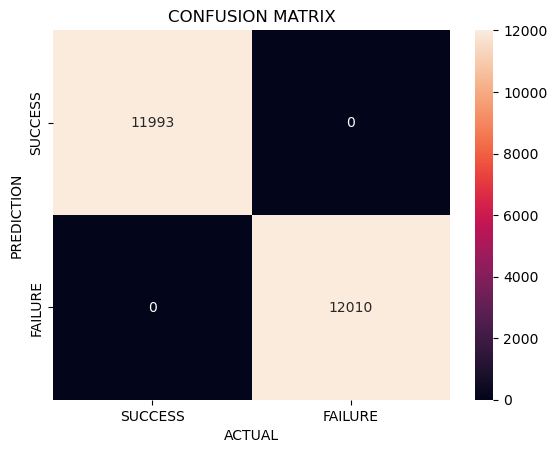

In [69]:
con_mat1=confusion_matrix(ldaff.predict(X_testff),Y_testff)
sns.heatmap(con_mat1,annot=True,fmt='g',xticklabels=['SUCCESS','FAILURE'],yticklabels=['SUCCESS','FAILURE'])
plt.ylabel("PREDICTION")
plt.xlabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()

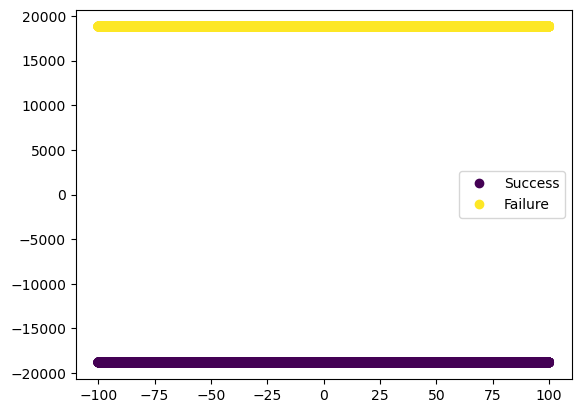

In [70]:
scatter1=plt.scatter(X_trainff['TIME'],xff,c=ldaff.predict(X_trainff))
plt.legend(handles=scatter1.legend_elements()[0],labels=['Success','Failure'])
plt.show()